In [1]:
import pickle

import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2

In [3]:
df = pd.read_csv('../../datasets/twitter/contents.csv', dtype={'label':'category'})
df

,text,label,parsed
0,"I`d have responded, if I were going",neutral,` respond go
1,Sooo SAD I will miss you here in San Diego!!!,negative,sooo sad miss san diego
2,my boss is bullying me...,negative,boss bully
3,what interview! leave me alone,negative,interview leave alone
4,"Sons of ****, why couldn`t they put them on t...",negative,sons **** ` put release already buy
...,...,...,...
27474,wish we could come see u on Denver husband l...,negative,wish could come see u denver husband lose job...
27475,I`ve wondered about rake to. The client has ...,negative,` wonder rake client make clear net ` force d...
27476,Yay good for both of you. Enjoy the break - y...,positive,yay good enjoy break - probably need hectic w...
27477,But it was worth it ****.,positive,worth ****


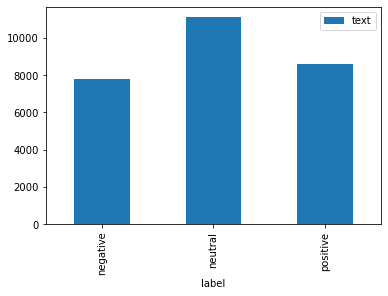

In [8]:
df.groupby('label').count()[['text']].plot.bar()
df['length'] = df['text'].str.len()

In [5]:
df.groupby('label').count()/len(df)
# Prédire la classe majoritaire → accuracy:40%
# /!\ imbalanced dataset → misleading

,text,parsed,News length
label,,,
negative,0.283162,0.283162,0.283162
neutral,0.404527,0.404527,0.404527
positive,0.312311,0.312311,0.312311


<AxesSubplot:title={'center':'length'}, xlabel='label'>

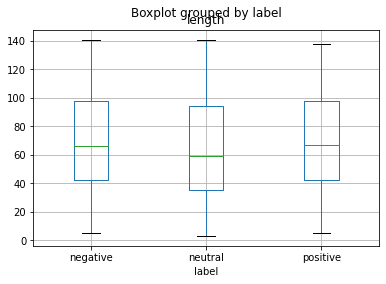

In [10]:
df['length'] = df['text'].str.len()
df.boxplot(column='length', by='label')

<AxesSubplot:title={'center':'News length'}, xlabel='label'>

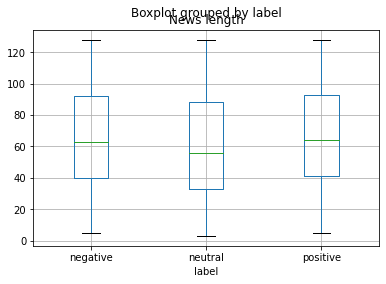

In [7]:
df[df['length'] < df['length'].quantile(0.95)].boxplot(column='length', by='label')